In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt

In [3]:
path = glob("/content/drive/MyDrive/03_March/Btech_cv19/Data/COVID/*.png")
path_nc = glob("/content/drive/MyDrive/03_March/Btech_cv19/Data/non-COVID/*.png")

## Histogram Equalization

In [5]:
#Hist eqali
image_no = 1
cv_img = []
for img in path:
    n = cv2.imread(img)
    img_yuv = cv2.cvtColor(n, cv2.COLOR_BGR2YUV)
    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    name = '/content/drive/MyDrive/03_March/Btech_cv19/HistEqa/COVID/' + str(image_no) + '.png'
    cv2.imwrite(name, img_output)
    image_no += 1

In [6]:
#Hist eqali
image_no = 1
cv_img = []
for img in path_nc:
    n = cv2.imread(img)
    img_yuv = cv2.cvtColor(n, cv2.COLOR_BGR2YUV)
    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    name = '/content/drive/MyDrive/03_March/Btech_cv19/HistEqa/non-COVID/' + str(image_no) + '.png'
    cv2.imwrite(name, img_output)
    image_no += 1

## Log Transformation

In [8]:
# Apply log transformation method
image_no = 1
cv_img = []
for img in path:
    n = cv2.imread(img)
    c = 255 / np.log(1 + np.max(n))
    log_image = c * (np.log(n + 1))
    # Specify the data type so that
    # float value will be converted to int
    log_image = np.array(log_image, dtype = np.uint8)
    name = '/content/drive/MyDrive/03_March/Btech_cv19/log_data/COVID1/' + str(image_no) + '.png'
    cv2.imwrite(name, log_image)
    image_no += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [9]:
image_no = 1
cv_img = []
for img in path_nc:
    n = cv2.imread(img)
    # Apply log transformation method
    c = 255 / np.log(1 + np.max(n))
    log_image = c * (np.log(n + 1))
    # Specify the data type so that
    # float value will be converted to int
    log_image = np.array(log_image, dtype = np.uint8)
    name = '/content/drive/MyDrive/03_March/Btech_cv19/log_data/non-COVID1/' + str(image_no) + '.png'
    cv2.imwrite(name, log_image)
    image_no += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


## Contrast Stretching

In [11]:
#constrast stretch
image_no = 1
cv_img = []
for img in path:
    n = cv2.imread(img)
    xp = [0, 64, 128, 192, 255]
    fp = [0, 16, 128, 240, 255]
    x = np.arange(256)
    table = np.interp(x, xp, fp).astype('uint8')
    final_img = cv2.LUT(n, table)
    name = '/content/drive/MyDrive/03_March/Btech_cv19/ConStr/COVID1/' + str(image_no) + '.png'
    cv2.imwrite(name, final_img)
    image_no += 1

In [12]:
#Contrast stretching
image_no = 1
cv_img = []
for img in path_nc:
    n = cv2.imread(img)
    xp = [0, 64, 128, 192, 255]
    fp = [0, 16, 128, 240, 255]
    x = np.arange(256)
    table = np.interp(x, xp, fp).astype('uint8')
    final_img = cv2.LUT(n, table)
    name = '/content/drive/MyDrive/03_March/Btech_cv19/ConStr/non-COVID1/' + str(image_no) + '.png'
    cv2.imwrite(name, final_img)
    image_no += 1

In [13]:
# Read an image
image = cv2.imread('/content/drive/MyDrive/03_March/Btech_cv19/Data/COVID/Covid (19).png')
image.shape

(199, 270, 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


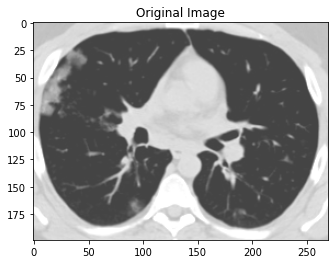

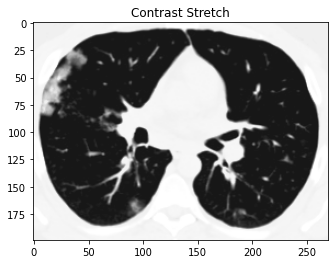

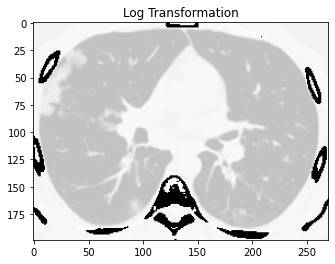

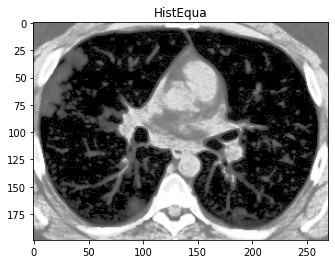

In [14]:

#Hist eqali
img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
   
# Apply log transformation method
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(image + 1))
   
# Specify the data type so that
# float value will be converted to int
log_image = np.array(log_image, dtype = np.uint8)
#######
#contrast stretch
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
final_img = cv2.LUT(image, table)

# Display both images
plt.imshow(image)
plt.title("Original Image")
plt.show()
plt.imshow(final_img)
plt.title("Contrast Stretch")
plt.show()
plt.imshow(log_image)
plt.title("Log Transformation")
plt.show()
plt.imshow(img_output)
plt.title("HistEqua")
plt.show()

In [16]:
def hist(img,title):    
    plt.hist(img.ravel(), 256, (0, 256))
    plt.xlabel('Pixels Range')
    plt.ylabel('Pixels Frequency')
    plt.legend(['Total'])
    plt.title('Histogram of ' + title+ ' Image') 
    plt.show()

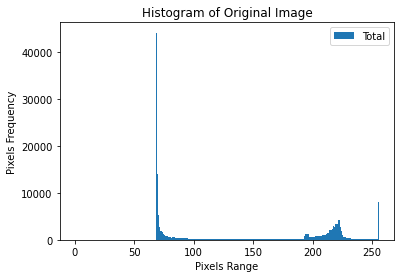

In [17]:
hist(image,'Original')

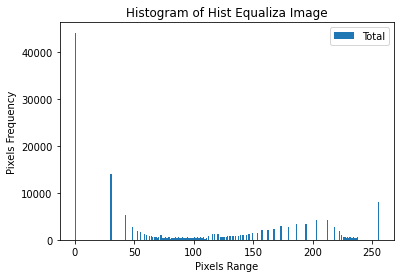

In [18]:
hist(img_output,'Hist Equaliza')

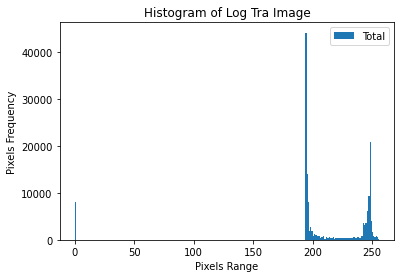

In [19]:
hist(log_image,'Log Tra')

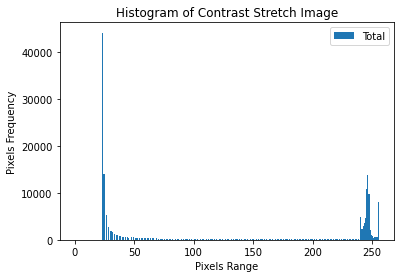

In [20]:
hist(final_img,'Contrast Stretch')